In [83]:
import os
import json
import pandas as pd
import sys
import collections

In [ ]:
!gdown 1IGZ0jRHFPB2OPFXB-1RoEhgbUZuHddBS
!gdown 143FpCQl9w2aB3EsVWxAcCuG4rF7K5F5l

In [ ]:
!unzip /content/non_rumor.zip
!unzip /content/rumor.zip

In [84]:
rumor_path=os.getcwd()+'/rumor'
non_rumor_path=os.getcwd()+'/non_rumor'
new_rumor_path=os.getcwd()+'/new_rumor_data'
new_non_rumor_path=os.getcwd()+'/non_rumor_new_data'

In [85]:
rumorList = list()
a_rumorList=list()
for (dirpath, dirnames, filenames) in os.walk(rumor_path):
    a_rumorList += [os.path.join(dirpath, file) for file in filenames if file.endswith('.json')]
for (dirpath, dirnames, filenames) in os.walk(new_rumor_path):
    rumorList += [os.path.join(dirpath, file) for file in filenames if file.endswith('.json')]


In [86]:
non_rumorList = list()
a_non_rumorList = list()
for (dirpath, dirnames, filenames) in os.walk(non_rumor_path):
    a_non_rumorList += [os.path.join(dirpath, file) for file in filenames if file.endswith('.json')]
for (dirpath, dirnames, filenames) in os.walk(new_non_rumor_path):
    non_rumorList += [os.path.join(dirpath, file) for file in filenames if file.endswith('.json')]


In [87]:
from bangla_stemmer.stemmer import stemmer
def stemmerbangla(data):
  wordlist = data.split(" ")
  stmr = stemmer.BanglaStemmer()
  stm = stmr.stem(wordlist)
  return " ".join(stm)

In [88]:
import re
def onlybangla(data):
  bangla=data.replace('\r', ' ').replace('\n', ' ')
  bangla = "".join(i for i in bangla if i in [" "] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
  return " ".join(bangla.split())

In [89]:
a_file = open(os.getcwd()+"/stopwords-bn.txt", "r")

bn_stopwords = []
for line in a_file:
  stripped_line = line.strip()
  bn_stopwords.append(stripped_line)

a_file.close()

In [90]:
def remove_stop_word(text):
  words = [word for word in text.split(" ") if word not in bn_stopwords]
  new_text = " ".join(words)
  return new_text

In [91]:
def rawtodf(listdata):
    listofdata=[]
    commentscount=0
    for datas in listdata:
        with open(datas, encoding='utf-8') as fh:
            data = json.load(fh)
            if data['text']!="" and len(data['comments'])!=0:
                no_duplication=list(dict.fromkeys(data['comments']))
                commentscount+=len(no_duplication)
                listofdata.append([data['text']," ".join(no_duplication),data['label']])
    return pd.DataFrame(listofdata, columns = ["text","comments","label"]),commentscount
      
    #listofRumorandNonrumor.append([data['text'],data['sharecount'],(lambda: 1, lambda: 0)[data['post_shared_link']==""](),data['reactions']['likes']/data['reactioncount'],data['reactions']['loves']/data['reactioncount'],data['reactions']['cares']/data['reactioncount'],data['reactions']['hahas']/data['reactioncount'],data['reactions']['wows']/data['reactioncount'],data['reactions']['sads']/data['reactioncount'],data['reactions']['angries']/data['reactioncount'],data['commentcount'],data['comments'][0]['comment'],data['posted_by']['isVerify'],data['isRumor']])

In [92]:
rumor,rumorcomments=rawtodf(rumorList)

In [93]:
non_rumor,nonrumorcomments=rawtodf(non_rumorList)

In [94]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
a_rumor,a_rumorcomments=rawtodf(a_rumorList)
a_non_rumor,a_nonrumorcomments=rawtodf(a_non_rumorList)
rumorcomments+=a_rumorcomments
nonrumorcomments+=a_rumorcomments
rumour=pd.concat([rumor,a_rumor])
non_rumour=pd.concat([non_rumor,a_non_rumor])

# Rumor sample

In [97]:
rumor.head(6)

text                                           comments  label
0  করোনা ভাইরাসের জন্য ঘরে থাকতে জনপ্রিয় অনলাইন ম...  আপনি কি পাইসেন নাকি ভাই? গুজব যত্তসব  শালা বাট...      0
1   ভারতে কন্টেইনারে পাওয়া অপহরণকৃত মৃত শিশুদের লাশ  আল্লাহ আমাদের মানুষরূপী জানোয়ার থেকে রক্ষা করু...      0
2  রাশিয়াকে বাদ দিলে ২০২২ (কাতার) বিশ্বকাপ ফুটবল ...  এইগুলা বলে মানুষকে আর হয়রানি কইরেন না  এইটা এক...      0
3  সিঙ্গাপুরভিত্তিক গবেষণা সংস্থা 'দ্য স্টাটিসটিক...  তাহলে কিম জং কি দোষ করলো  বালছাল ভুয়া এইসব গুজ...      0
4  পাকিস্তান আইনসভা চীনা ভাষা, মান্দারিনকে দেশটির...  এসব গুজব সৃষ্টিকারীর বিচার হওয়া উচিত  এসব নিয়ে...      0
5  ধর্ম অবমাননার জন্য এই জুতার নিচে ইসলাম ধর্মের ...  অনেক নেক্কারজনক কাজ করেছে আল্লাহর মাইর বড়  মাই...      0

In [70]:
non_rumor.sample(6)

text                                           comments  label
448  না ফেরার দেশে চলে গেলেন প্রখ্যাত সাংবাদিক কলাম...  আপনি আজীবন বেঁচে থাকবেন বাংলাদেশের মানুষের মাঝ...      1
327  ভাসানী অনুসারী পরিষদের চেয়ারম্যান ও গণস্বাস্থ্...  আমেরিকার উচিৎ-ভারতের চোখ দিয়ে বাংলাদেশ আর না দ...      1
204  ধানবোঝাই ট্রাক্টর উল্টে শ্রমিক নিহত\nচাঁপাইনব...  ট্রাক্টর চালক দায়ী এই দূর্ঘটনার জন্য। গাড়িটির ...      1
180  চট্টগ্রামের ইপিজেড এলাকায় বাজারের আগুন নিয়ন্ত্...  হে প্রভু, আসমানের বলা আসমানে ও জমিনের বলা জমিন...      1
420  ‘আগামী দিনের আন্দোলনে শুধু ঢাকা নয়, সারাদেশ অচ...  আওয়ামী লীগ ছাড়া দেশ কখনোই উন্নত হতো না করোনার ...      1
147  ভারতে গ্রেপ্তার দেশের শীর্ষস্থানীয় অর্থ পাচারক...  এভাবেই একে একে প্রানপ্রিয় বঙ্গবন্ধুর অদেখা স্ব...      1

In [71]:
rumour.shape

(600, 3)

In [72]:
non_rumour.shape

(1637, 3)

In [73]:
df=pd.concat([rumour,non_rumour])
df.shape

(2237, 3)

In [74]:
df=df.drop_duplicates(subset=['text'], inplace=False)

In [75]:
df.shape

(2077, 3)

In [78]:
df.sample(frac=1)

text                                           comments  label
393    ২৭ বছর বয়সী ওই ব্যক্তির নাম রাফায়েল স্যামুয...  আরে রাফায়েল ভাই, আপনি তো আমার মনের কথা বলে দি...      0
145   পশ্চিম তীরে ইসরায়েলি বাহিনীর গুলিতে নিহত আল জ...  ইসরায়েলরা পৃথিবীর পরিবেশ নষ্ট করছে।\n ইয়া আল্ল...      1
818   আন্তর্জাতিক দাতাসংস্থা বিশ্বব্যাঙ্ক বাংলাদেশের...  ক্রেতার দাবি সরকার মেনে নেবেন এটাই স্বাভাবিক। ...      1
823   দক্ষিণ এশিয়ার দেশগুলোর সঙ্গে বাংলাদেশের এখন যে...  খাদ্যের দাম বস্তায় আবারও ২০০ -৩০০ টাকা বাড়ছে।ব...      1
242   নিজস্ব মতিবেদকঅনলাইনের টুটি চেপে ধরার সরকারী প...  এসব কি বলে আসলে সে মাগি বাজ বাংলাদেশের মুসলিম ...      0
1008  খুলনা: আগামী একাদশ জাতীয় সংসদ নির্বাচনে অংশ নি...  মাননীয় প্রধানমন্ত্রী আপনাকে ধন্যবাদ,আমরা বিদু্...      1
243   ফেরির তুলনায় টোল হার দেড় গুণ বেড়ে যাওয়ায় এর প্...  এদেরকে ফ্রী দিলেও বলবে গ্যাস, তেলের টাকা চাই। ...      1
897   চলছে এশিয়া কাপের ১৪ তম আসর ।  গ্রুপ পর্বের শেষ...  আলহামদুলিল্লাহ আপনাদের ভালোবাসায় আমার এখন ৩৭০...      1
668   তথ্য প্রতিমন্ত্রী তারানা হালিম বলেছেন, চলতি মা...  টানা চারবার দুর্নীতি চ্যাম্পিয়ন বিএনপিকেই চাই ...      1
287   খুলনায় আজ বৃহস্পতিবার সকাল সাড়ে ১০টার দিকে নদী...  এটা ভালো ভাবে তদারকি না করলে সব অাগে যা ছিল তা...      1
22    রম্য লেখক আহসান হাবীবকে হত্যার হুমকি দিয়েছে দু...  গুজব ছড়িয়ে উত্তেজনা সৃষ্টি করবেন না। কত নমুন...      0
11    সাঈদী সাহেবের মুখ চাঁদে দেখা গিয়েছিল।  অনেকে ত...  যাদের ঈমান নেই তারা এইসব বিশ্বাস করবে না  এই স...      0
473   জানা গেছে, বালিয়াকান্দি উপজেলার জামালপুর ইউনি...  এ তো দেখি সব পাগলের কারখানা  খোঁদা কতো কিছু যে...      0
933   বিএনপির সিনিয়র যুগ্ম মহাসচিব অ্যাডভোকেট রুহুল ...  শেখ হাসিনা Bangladesh কে এক অনন্য উচ্চতায় নিয়...      1
65    ডান পায়ের চারটি জায়গায় স্প্লিন্টারের ক্ষতচিহ্ন...  অভিনব সব খবর👌👌 আমি অনেক কস্ট করে ইসলামি ভিডিও ...      1
164   বগুড়া জেলা আওয়ামী লীগের যুগ্ম সম্পাদক মঞ্জুরুল...  বাংলাদেশ সরকার সিন্ডিকেট প্রধানমন্ত্রী মাননীয় ...      1
502   দুবাইয়ের তাপমাত্র ৪৩ ডিগ্রিতে উঠা নামা করছে । ...  সাকিব আল হাসান বিশ্ব সেরা অলরাউনডার। তার শারীর...      1
464   এএফসি অনূর্ধ্ব-১৬ বাছাইপর্বে নিজেদের দ্বিতীয় ম...  খেলা জমে গেছে সুসময় অসময়ে যারা আমাদের পাশে ছিল...      1
481   এএফসি অনূর্ধ্ব-১৬ ফুটবলের বাছাই পর্বে আনুচিং ম...  সাবাস বাংলাদেশ জাতি পিতা বলার কারণে তার ইমান থ...      1
270   সন্ত্রাস, দুর্নীতি ও মাদকমুক্ত কল্যাণ রাষ্ট্র ...  ধন্যবাদ ইসলামী আন্দোলন বাংলাদেশ কে গণমানুষের অ...      1
724   বরিশালে ইউপি চেয়ারম্যান ও আওয়ামী লীগ নেতা বিশ্...  এখন কারও মাথা ব্যাথা নাই\n কিন্তু আপনারা সাপ ছ...      1
713   নারায়ণগঞ্জ: নারায়ণগঞ্জের রূপগঞ্জে বিদ্যুৎস্পৃষ...  আহারে কি একটা দুঃখের কথা  এইটা কি মেনে নেয়া যা...      1
100   আগামী সংসদ নির্বাচনের আগে দেশ-বিদেশে এমন পরিস্...  ভয় একটু পেয়েছে শ্রীলঙ্কা কে দেখে এটা নিশ্চিত। ...      1
33    ফাইল ছবি মালয়েশিয়ায় সড়ক দুর্ঘটনায় আহত হয়ে হাসপ...  দুঃখ জনক,, এই এলাকার প্রতি প্রশাসনের দৃষ্টি আক...      1
501   কাম্প নউয়ে মঙ্গলবার স্থানীয় সময় বিকালে ইউরোপ স...  বাংলাদেশ অসাধারণ খেলেছে কালকে। বোলার সবাইএ দার...      1
181   ৩৫ বছর আগে এসএসসি পাস করেছেন এ রকম একদল নারী স...  অনেক মানসমপন্ন সিনেমা হাঊছ ফুল ।\n বাবা তোমার ...      1
314   রাজশাহী সিটি কর্পোরেশনের (রাসিক) মেয়র এএইচএম খ...  ভালো কাজ করেছেন। যুগান্তকারী রায়। খায়রুজ্জামান...      1
203   ফাইল ছবি ‘আল হাইয়াতুল উলিয়া লিল জামিয়াতিল কাওম...  আমাদের দেশের জনগণ গভীর ঘুমে আছে। আমি কালেমার দ...      1
742   একদিনে তিনটি অপমৃত্যুর ঘটনা ঘটেছে কুলাউড়া উপজে...  এইটা কি মেনে নেয়া যায়? আহারে কি একটা দুঃখের কথ...      1
608   বৃহস্পতিবার রাত সাড়ে ১১টার দিকে হলের সন্তোষ চন...  এসব দেখার কেউ নাই  সরকারের উচিত এর জন্য কোনো ব...      1
327   ভাসানী অনুসারী পরিষদের চেয়ারম্যান ও গণস্বাস্থ্...  আমেরিকার উচিৎ-ভারতের চোখ দিয়ে বাংলাদেশ আর না দ...      1
139    ইস্পট ফিকসিং করে ক্রিকেট থেকে নিষিদ্ধ হওয়া ও ...  দূর কেন যে টয়লেটে বসে তর ভিডিও দেখতে গেলাম এখন...      0
1061  দ্য রিপোর্ট ডেস্ক : মিয়ানমারের সেনাবাহিনী রোহি...  চায়নার সঙ্গে দ্রুত তিস্তা প্রকল্পটি বাস্তবায়...      1
23    বেলাবো থানার ওসি জাবদ মাহমুদ জানান, উপজেলার ইব...  শেখ হাসিনার  মতো প্রধানমন্ত্রী  যে দেশের মানুষ...      1
594   সরকারি টাকায়  আকাশ পথে ভ্রমণের ক্ষেত্রে রাষ্ট্...  এত ত

In [80]:
df['clean_text'] = df['text'].apply(onlybangla).apply(remove_stop_word).apply(stemmerbangla).apply(remove_stop_word)
df['clean_comments'] = df['comments'].apply(onlybangla).apply(remove_stop_word).apply(stemmerbangla).apply(remove_stop_word)
df_shuffle=df.sample(frac=1)


applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
appl

applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied third rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
appli

applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applie

applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
ap

applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied third rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied

applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
app

applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..


applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..

applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
app

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
appl

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied third rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied third rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
appl

applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
appli

applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..

applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
appli

applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
ap

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..


applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applie

applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
a

applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
app

applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
ap

applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
ap

applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
ap

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules.

applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
a

applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
appli

applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
ap

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied third rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
appli

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..


applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
appl

applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applie

applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rul

applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied third rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..

applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied third rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied third rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules.

applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..

applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied third rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
appli

applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
ap

applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
a

applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
ap

applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applie

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rule

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied third rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
appli

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
app

applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
appl

applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied third rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rule

applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied

applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied firs

applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
ap

applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied f

applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied third rules..
applied first rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied third rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..


applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules.

applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
a

applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied third rules..
applied fourth rules..
applied first rules..
applied third rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied third rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first

applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied f

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied third rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
appli

applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..


applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied third rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applie

applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied third rules..
applied first rules..
applied third rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
appl

applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied 

applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied third rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..


applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied third rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied third rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourt

applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..


applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied third rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied third rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
a

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..


applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied 

applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied third rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied third rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied 

applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied third rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied third rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fo

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied third rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
appli

In [81]:
df_shuffle=df_shuffle.reindex(columns=['text','clean_text','comments','clean_comments','label'])
df_shuffle

text                                         clean_text                                           comments                                     clean_comments  label
206   কার্ব মার্কেট বা খোলাবাজারে ডলারের সংকটের কারণ...  কার্ব মার্কেট খোলাবাজারে ডলার সংকট কারণে প্রথম...  বাংলাদেশ এখন একটি বড় সমস্যার সম্মুখীন কিন্তু ...  বাংলাদেশ বড় সমস্য সম্মুখীন বাংলাদেশ সরক এখনো ...      1
685   ইরানের সাথে নতুন করে সমঝোতা চুক্তি করতে চায় যু...  ইরান সাথে সমঝোতা চুক্তি চায় যুক্তরাষ্ট্র বুধব ...  দেশ টা সিন্ডিকেট ব্যবসায়ীদের দখলে চলে গেছে  তা...  দেশ টা সিন্ডিকেট ব্যবসায়ী দখলে বাল ছিড়ে বাংলা...      1
15    বাংলাদেশে স্যামসাং এর নতুন খাড়াখানা হতে যাচ্ছে...                বাংলাদেশ স্যামসাং খাড়াখানা গাজীপুরে  শেখ হাসিনার ডিজিটাল বাংলাদেশ  গাজীপুরের মানুষে...  শেখ হাসিন ডিজিটাল বাংলাদেশ গাজীপুর মানুষ কর্মস...      0
359   সামাজিক যোগাযোগ মাধ্যম ফেসবুক ও ইউটিউবে বঙ্গবন...  সামাজিক যোগাযোগ মাধ্যম ফেসবুক ইউটিউবে বঙ্গবন্ধ...  সেফুদার মুক্তি চাই  মদ খা মানুষ হ।গরিব, ছোটলোক...  সেফুদ মুক্তি চাই মদ খা মানুষ হগরিব ছোটলোক মুরু...      0
69    রাশিয়া-ইউক্রেইন যুদ্ধে আর কারো লাভ না হোক পাকি...  রাশিয়াইউক্রেইন যুদ্ধে কারো লাভ পাকিস্তান লাভ হ...  যা মন চায় লিখে দিলেই হইলো?  এইসব মিথ্যা বলা বন...  মন চায় লিখে দিলে হইলো এইসব মিথ্যা বন্ধ গেঞ্জাম...      0
233   মানবদেহে কাজ করছে না বহুল প্রচলিত ও গুরুত্বপূর...  মানবদেহ বহুল প্রচলিত গুরুত্বপূর্ণ ৬৭ শতাংশ অ্য...  হলুদ,রসুন, লেবি মিক্স করে এন্টিবায়োটিক বানান। ...  হলুদরসুন লেবি মিক্স এন্টিবায়োটিক বানান এইগুলা ...      1
111   দিল্লী মতিনিধি, পরিবেশের অভাবে বাংলা ছেড়ে যুক্...  দিল্লী মতিনিধি পরিবেশের অভাবে বাংলা ছাড় যুক্ত ...  আর কি বালের তামাশা কল এই গুলা। খানকি মরলে বুজব...  বাল তামাশা কল গুলা খানকি মরলে বুজবি তুদের বের ...      0
519   পাকিস্তানের তারকা ক্রিকেটার শোয়েব মালিককে বিয়ে...  পাকিস্তান তারকা ক্রিকে শোয়েব মালিক বিয়ে ভারত ট...  এগিয়ে যাও বাংলাদেশ।♥️♥️♥️ শেখ হাসিনা Banglade...  এগিয়ে যাও বাংলাদেশ শেখ হাসিনা এক অনন্য উচ্চতা...      1
416   বেংগালর মতিনিধিদুর্নীতীর মাধ্যমে কুটি কুটি রুপ...  বেংগালর মতিনিধিদুর্নীতীর কুটি কুটি রুপি কামা অ...  হাহা, বড়ই হাস্যকর। এভাবেই যারা পাহাড়ে তারা আরও...  হাহা বড় হাস্যকর এভাবে পাহাড়ে বড় পাহাড়ে উঠ মাটি...      0
1014  তৃতীয় দফা নির্বাচনী যাত্রা শুরু করেছে আওয়ামী ল...  তৃতীয় দফা নির্বাচনী যাত্ আওয়ামী লীগ শনিব সকালে...  সত্য,সুন্দর ও ন্যায়ের পৃথিবী"প্রতিষ্ঠিত হোক......  সত্যসুন্দর ন্যায় পৃথিবীপ্রতিষ্ঠিত তুই আসলে বাট...      1
440   দ্বিতীয় বিভাগ দাবায় অপরাজিত চ্যাম্পিয়ন হয়েছে শ...  দ্বিতীয় বিভাগ দাবায় অপরাজিত চ্যাম্পিয়ন শাহিন চ...  সর্বকালের সর্বশ্রেষ্ঠ সৎ সাহসী বিচক্ষণ জ্ঞানী ...  সর্বকাল সর্বশ্রেষ্ঠ সৎ সাহসী বিচক্ষণ জ্ঞানী নে...      1
89    গতকাল (১৪ নভেম্বর) নয়াপল্টনে বিএনপির কার্যালয়ে...  গতকাল ১৪ নভেম্বর নয়াপল্টনে বিএনপির কার্যালয় বি...  এই ইউসুফ মুল্লাটা ও ছাগল, সবকিছুই কুরান থেকে আ...  ইউসুফ মুল্লা ছাগল সবকিছু কুরান আবিষ্ক হি হি হি...      0
207   অশনির প্রভাব এখনো পুরোপুরি কমেনি। অশনির ফাঁড...  অশনির প্রভাব এখনো পুরোপুরি কমেনি অশনির ফাঁড়...  অবশেষে নাসা'র চোখকে ফাকি দিয়ে ভয়ংকর ঘূর্নিঝড় "...  অবশেষ নাসা চোখ ফাকি দিয়ে ভয়ংকর ঘূর্নিঝড় সয়াবিন...      1
150   আজ বুদ্ধ পূর্ণিমা। দেশের বৌদ্ধ সম্প্রদায় তাদের...  বুদ্ধ পূর্ণিমা দেশের বৌদ্ধ সম্প্রদায় প্রধান ধর...  শুভ বুদ্ধপূর্ণিমা।\nবৌদ্ধ ধর্মাবলম্বী সকলকে শু...  শুভ বুদ্ধপূর্ণিমা বৌদ্ধ ধর্মাবলম্বী সকল শুভেচ্...      1
451   এশিয়া কাপের সুপার ফোরে পাকিস্তান এবং আফগানিস্ত...  এশিয়া কাপ সুপ ফোরে পাকিস্তান আফগানিস্তান ম্যাচ...  এগুলি নিউজও হবে না।তীব্র প্রতিবাদ জানাই। শুভ ক...  নিউজ নাতীব্র প্রতিবাদ শুভ কামনা এক কথায় অসাধার...      1
804   প্রযুক্তি ডেস্ক আরটিএনএন ওয়াশিংটন: সামাজিক যোগ...  প্রযুক্তি ডেস্ক আরটিএনএন ওয়াশিংটন সামাজিক যোগা...  বাংলার জনগণ চায় বাংলাদেশি কোম্পানিগুলো একসময়...  বাংল জনগণ বাংলাদেশি কোম্পানি একসময় বিশ্ব বুক ...      1
420   ‘আগামী দিনের আন্দোলনে শুধু ঢাকা নয়, সারাদেশ অচ...  আন্দোলনে ঢাকা সারাদেশ অচল শেখ হাসিনা সরকার পতন...  আওয়ামী লীগ ছাড়া দেশ কখনোই উন্নত হতো না করোনার ...  আওয়ামী লীগ ছাড়া দেশ কখনো উন্নত করোন সময় সরক দে...      1
137   অবহেলা বা বেপরোয়া মোটরযান চালনার কারণে দুর্ঘটন...  অবহেলা বেপরোয়া মোটরযান চালন কারণে দুর্ঘটনায় প্...  আমাদের দেশের জনগণ গভীর ঘুমে আছে। এই গুলা নিয়া ...  দেশে

In [82]:
df_shuffle=df_shuffle.drop(['text', 'comments'], axis=1)
df_shuffle

clean_text                                     clean_comments  label
206   কার্ব মার্কেট খোলাবাজারে ডলার সংকট কারণে প্রথম...  বাংলাদেশ বড় সমস্য সম্মুখীন বাংলাদেশ সরক এখনো ...      1
685   ইরান সাথে সমঝোতা চুক্তি চায় যুক্তরাষ্ট্র বুধব ...  দেশ টা সিন্ডিকেট ব্যবসায়ী দখলে বাল ছিড়ে বাংলা...      1
15                  বাংলাদেশ স্যামসাং খাড়াখানা গাজীপুরে  শেখ হাসিন ডিজিটাল বাংলাদেশ গাজীপুর মানুষ কর্মস...      0
359   সামাজিক যোগাযোগ মাধ্যম ফেসবুক ইউটিউবে বঙ্গবন্ধ...  সেফুদ মুক্তি চাই মদ খা মানুষ হগরিব ছোটলোক মুরু...      0
69    রাশিয়াইউক্রেইন যুদ্ধে কারো লাভ পাকিস্তান লাভ হ...  মন চায় লিখে দিলে হইলো এইসব মিথ্যা বন্ধ গেঞ্জাম...      0
233   মানবদেহ বহুল প্রচলিত গুরুত্বপূর্ণ ৬৭ শতাংশ অ্য...  হলুদরসুন লেবি মিক্স এন্টিবায়োটিক বানান এইগুলা ...      1
111   দিল্লী মতিনিধি পরিবেশের অভাবে বাংলা ছাড় যুক্ত ...  বাল তামাশা কল গুলা খানকি মরলে বুজবি তুদের বের ...      0
519   পাকিস্তান তারকা ক্রিকে শোয়েব মালিক বিয়ে ভারত ট...  এগিয়ে যাও বাংলাদেশ শেখ হাসিনা এক অনন্য উচ্চতা...      1
416   বেংগালর মতিনিধিদুর্নীতীর কুটি কুটি রুপি কামা অ...  হাহা বড় হাস্যকর এভাবে পাহাড়ে বড় পাহাড়ে উঠ মাটি...      0
1014  তৃতীয় দফা নির্বাচনী যাত্ আওয়ামী লীগ শনিব সকালে...  সত্যসুন্দর ন্যায় পৃথিবীপ্রতিষ্ঠিত তুই আসলে বাট...      1
440   দ্বিতীয় বিভাগ দাবায় অপরাজিত চ্যাম্পিয়ন শাহিন চ...  সর্বকাল সর্বশ্রেষ্ঠ সৎ সাহসী বিচক্ষণ জ্ঞানী নে...      1
89    গতকাল ১৪ নভেম্বর নয়াপল্টনে বিএনপির কার্যালয় বি...  ইউসুফ মুল্লা ছাগল সবকিছু কুরান আবিষ্ক হি হি হি...      0
207   অশনির প্রভাব এখনো পুরোপুরি কমেনি অশনির ফাঁড়...  অবশেষ নাসা চোখ ফাকি দিয়ে ভয়ংকর ঘূর্নিঝড় সয়াবিন...      1
150   বুদ্ধ পূর্ণিমা দেশের বৌদ্ধ সম্প্রদায় প্রধান ধর...  শুভ বুদ্ধপূর্ণিমা বৌদ্ধ ধর্মাবলম্বী সকল শুভেচ্...      1
451   এশিয়া কাপ সুপ ফোরে পাকিস্তান আফগানিস্তান ম্যাচ...  নিউজ নাতীব্র প্রতিবাদ শুভ কামনা এক কথায় অসাধার...      1
804   প্রযুক্তি ডেস্ক আরটিএনএন ওয়াশিংটন সামাজিক যোগা...  বাংল জনগণ বাংলাদেশি কোম্পানি একসময় বিশ্ব বুক ...      1
420   আন্দোলনে ঢাকা সারাদেশ অচল শেখ হাসিনা সরকার পতন...  আওয়ামী লীগ ছাড়া দেশ কখনো উন্নত করোন সময় সরক দে...      1
137   অবহেলা বেপরোয়া মোটরযান চালন কারণে দুর্ঘটনায় প্...  দেশের জনগণ গভীর ঘুমে গুলা নিয়া মাথা ব্যথা সরক ...      1
662   নিজস্ব প্রতিবেদক আরটিএনএন ঢাকা পবিত্র আশু উপলক...  গুলা প্রচ এক প্রক মূর্খামী আপনা খারাপ জিনিস ভা...      1
57    শিক্ষামন্ত্রী নুরুল ইস নাহিদ রাত ১০ শিক্ষার্থী...  আপনা অনলাইনে থাকলে দোষ চালাইলেই দোষ সরক স্বৈরশ...      0
301   যশোরবেনাপোল জাতীয় মহাসড়ক যথাযথ মান প্রশস্ততায় ...  বিশ্ববু মাথা উঁচু দাঁড় সক্ষমতা দেখ মাননীয় সফল ...      1
450   পশ্চিমমধ্য বাড্ডা তৎসংলগ্ন এলাকায় অবস্থানরত প...  ভুয়া হে আল্লাহ্ রক্ষা করো আমিন খবরে দেখ দোয়া ন...      0
238   নীলফামারীর সৈয়দপুরে টিকটক নদী ডুবে মোস্তাকিন ১...  দুঃখজনক সত্য সমাজ একজন বিবেক প্রতিবন্ধী কমল ছা...      1
928   শুক্রব সকালে জাতীয় প্রেস ক্লাবে দিবস উপলক্ষ্যে...  এসব দেখি পাগল হাট বাজা বঙ্গবন্ধু শেখ মুজিবুর র...      1
930   বুধবারে সংসদে মানঅভিমান করল কার মান ভাঙা যাব জ...  সত্যসুন্দর ন্যায় পৃথিবীপ্রতিষ্ঠিত উন্নয়ন দেশের...      1
412   এক অফিস প্রাণভয় পাল পেছনে তাড়া ক্ষিপ্ত জনতা হা...  পুলিশ অফিস মাদারছদ জানি করসে মাইরা ফেলা জানয়ার...      0
590   উপজেল প্রত্যান্ত অঞ্চলে বিলবোর্ড ফেস্টুন দিবস ...  বিএনপি আসলে এক কল্পনা বিলাশী দল এইরকম কল্পনা ব...      1
897   চল এশিয়া কাপ ১৪ তম আসর গ্রুপ পর্ব শেষ পর্য টুর...  আলহামদুলিল্লাহ আপনা ভালোবাসায় ৩৭০ সাবস্ক্রাইব...      1
447   ব্রিটিশ শাসনামলে ১৭৭২ ১৭৮৫ সাল ইউরোপ হল্যান্ড ...  হাহা তোমরা আলু আট থেকো গবেষণা করো পেয়াজ রসূন ম...      0
1044  সিরিয় ওপর ইসরাইল বিমান হামলা দেশ সার্বভৌমত্ব চ...  আল্লাহ মুসলিম ভাই রক্ষা করো বিজয় ফিলিস্তিন ইনশ...      1
410   রোবব বিকেল প্রকাশিত ভিডি স্টোরি নায়লা নাঈম বাং...  আল্লাহ সকল মুসলমান রক্ষা করো রঙ খেলা জানো রে র...      1
229   আইনি বাধা থাকলে সংসদ নির্বাচনে ইভিএম প্রধান নি...  যোগ্য পিত যোগ্য উত্তরসূরী চাল কেবল আল্লাহ জানে...      1
279   দেশ প্রথমবার খোলা বাজারে ডল সেঞ্চুরি করল এক ব্...  ডল মানে বঙ্গবন্ধু শেখ মুজিবুর রহমান দেশ তেল সং...      1
37    করোনাভাইরাস সংক্রামণ রোধে কণ্ঠনালী ভেজা রাখ ভা...  লাভ দূরত্ব বজায় চল মন চায় এক নিয়ম বানায় দিলে হ...      0
337   বিশ্ববিখ্যাত ব্রিটিশ ব্যান্ড বিটলস ঈদ উপলক্ষ্য...

In [32]:
# importing the important library
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from scipy.sparse import hstack
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from matplotlib.pyplot import figure

In [26]:
def feature_process(clean_data_train, clean_data_test , train_labels):
    ''' This function except the clean data and return Train and Test dataset after stacking userids, profanity vector, negative sentiment, neutral sentiment, 
                    positive sentiment, compound sentiment, n-grams and tfidf features'''
    # Vectorization parameters
    # Range (inclusive) of n-gram sizes for tokenizing text.

    ngram_range=(1, 2)
    # Limit on the number of features. We use the top 5k features.
    TOP_K = 5000

    # Whether text should be split into word or character n-grams.
    # One of 'word', 'char'.
    TOKEN_MODE = 'word'

    # Minimum document/corpus frequency below which a token will be discarded.
    MIN_DOCUMENT_FREQUENCY = 2

    kwargs = {
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': TOKEN_MODE,  # Split text into word tokens.
            'min_df': MIN_DOCUMENT_FREQUENCY,
    }
    
    
    tfidf = TfidfVectorizer(**kwargs)
    tvt=make_column_transformer((tfidf,'clean_text'),(tfidf,'clean_comments'))
    tvt.fit(clean_data_train)
    tfidf_ngrams_train = tvt.transform(clean_data_train)
    tfidf_ngrams_test = tvt.transform(clean_data_test)
    
    
    
    selector = SelectKBest(f_classif, k=min(TOP_K, tfidf_ngrams_train.shape[1]))
    selector.fit(tfidf_ngrams_train, train_labels)
    x_train = selector.transform(tfidf_ngrams_train).astype('float32')
    x_val = selector.transform(tfidf_ngrams_test).astype('float32')
    return x_train, x_val

In [27]:
y=df_shuffle['label']
X=df_shuffle.drop('label', axis=1, inplace=False)

In [28]:
X_train_clean, X_test_clean, y_train, y_test= train_test_split(X, y, test_size=0.3,stratify=y, random_state=92)

In [29]:
#Calling feature_process which return the complete train and test dataset.

Train, Test = feature_process(X_train_clean, X_test_clean,y_train)

/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:2029: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  warnings.warn(


In [40]:
def plot_confusion_matrix(test_y, predict_y):
    
    '''This function returns confusion matrix, precison matrix and recall matrix for 3 class classification'''
    
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    
    labels = ['Rumor', 'Non_rumor']
    cmap=sns.light_palette("green")
    
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix" , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in Recall matrix",A.sum(axis=1))

Fitting 10 folds for each of 11 candidates, totalling 110 fits
[CV 1/10; 1/11] START C=0.0001, kernel=linear...................................
[CV 1/10; 1/11] END C=0.0001, kernel=linear;, score=(train=0.744, test=0.740) total time=   0.1s
[CV 2/10; 1/11] START C=0.0001, kernel=linear...................................
[CV 2/10; 1/11] END C=0.0001, kernel=linear;, score=(train=0.744, test=0.740) total time=   0.1s
[CV 3/10; 1/11] START C=0.0001, kernel=linear...................................
[CV 3/10; 1/11] END C=0.0001, kernel=linear;, score=(train=0.744, test=0.740) total time=   0.1s
[CV 4/10; 1/11] START C=0.0001, kernel=linear...................................
[CV 4/10; 1/11] END C=0.0001, kernel=linear;, score=(train=0.743, test=0.745) total time=   0.1s
[CV 5/10; 1/11] START C=0.0001, kernel=linear...................................
[CV 5/10; 1/11] END C=0.0001, kernel=linear;, score=(train=0.743, test=0.745) total time=   0.1s
[CV 6/10; 1/11] START C=0.0001, kernel=linear..

[CV 8/10; 5/11] END C=0.5, kernel=linear;, score=(train=0.891, test=0.876) total time=   0.1s
[CV 9/10; 5/11] START C=0.5, kernel=linear......................................
[CV 9/10; 5/11] END C=0.5, kernel=linear;, score=(train=0.886, test=0.876) total time=   0.1s
[CV 10/10; 5/11] START C=0.5, kernel=linear.....................................
[CV 10/10; 5/11] END C=0.5, kernel=linear;, score=(train=0.891, test=0.883) total time=   0.1s
[CV 1/10; 6/11] START C=0.75, kernel=linear.....................................
[CV 1/10; 6/11] END C=0.75, kernel=linear;, score=(train=0.898, test=0.911) total time=   0.1s
[CV 2/10; 6/11] START C=0.75, kernel=linear.....................................
[CV 2/10; 6/11] END C=0.75, kernel=linear;, score=(train=0.904, test=0.904) total time=   0.1s
[CV 3/10; 6/11] START C=0.75, kernel=linear.....................................
[CV 3/10; 6/11] END C=0.75, kernel=linear;, score=(train=0.901, test=0.877) total time=   0.1s
[CV 4/10; 6/11] START C=0.7

[CV 5/10; 10/11] END C=1.75, kernel=linear;, score=(train=0.913, test=0.910) total time=   0.1s
[CV 6/10; 10/11] START C=1.75, kernel=linear....................................
[CV 6/10; 10/11] END C=1.75, kernel=linear;, score=(train=0.907, test=0.945) total time=   0.1s
[CV 7/10; 10/11] START C=1.75, kernel=linear....................................
[CV 7/10; 10/11] END C=1.75, kernel=linear;, score=(train=0.915, test=0.890) total time=   0.1s
[CV 8/10; 10/11] START C=1.75, kernel=linear....................................
[CV 8/10; 10/11] END C=1.75, kernel=linear;, score=(train=0.911, test=0.890) total time=   0.1s
[CV 9/10; 10/11] START C=1.75, kernel=linear....................................
[CV 9/10; 10/11] END C=1.75, kernel=linear;, score=(train=0.913, test=0.903) total time=   0.1s
[CV 10/10; 10/11] START C=1.75, kernel=linear...................................
[CV 10/10; 10/11] END C=1.75, kernel=linear;, score=(train=0.914, test=0.897) total time=   0.1s
[CV 1/10; 11/11] S

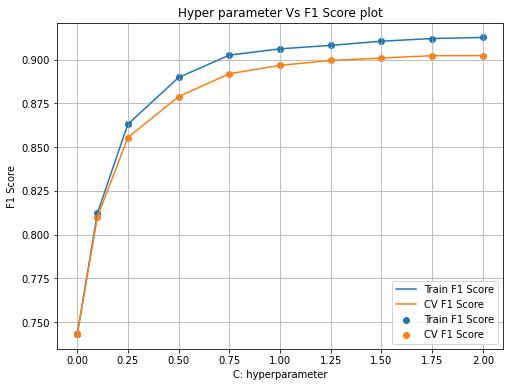

In [53]:
svm = SVC(gamma='auto')
parameters = {'C':[ 0.0001, 0.001, 0.1, 0.25, 0.50, 0.75, 1, 1.25, 1.5, 1.75, 2.0], 'kernel': ['linear']}
clf = GridSearchCV(svm, parameters,cv=10, scoring='f1_micro', return_train_score=True, verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_C']
plt.figure(figsize=(8,6))
plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
#plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
#plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [37]:
clf.best_params_

{'C': 1.75, 'kernel': 'linear'}

Number of misclassified points  11.378205128205128
-------------------------------------------------- Confusion matrix --------------------------------------------------


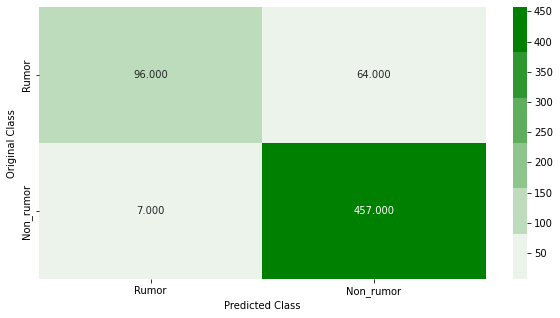

-------------------------------------------------- Precision matrix --------------------------------------------------


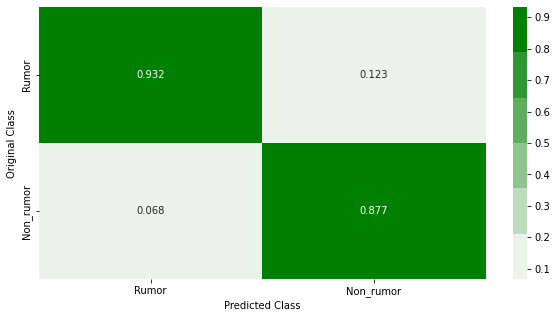

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


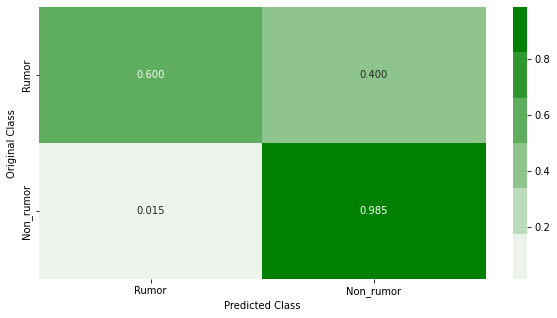

Sum of rows in Recall matrix [1. 1.]


In [41]:
svm_clf = SVC(C=1.75, gamma='auto', kernel='linear', probability=True)
svm_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, svm_clf.predict(Test))
# print(accuracy_score(y_test, svm_clf.predict(Test)))

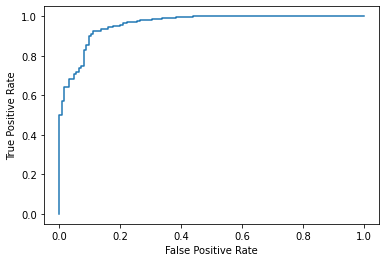

In [81]:
#define metrics
y_pred_proba = svm_clf.predict_proba(Test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

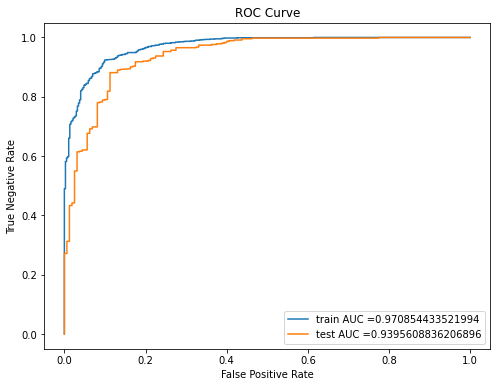

In [46]:
train_fpr, train_tpr, thresholds = metrics.roc_curve(y_train, svm_clf.predict_proba(Train)[::,1])
test_fpr, test_tpr, thresholds = metrics.roc_curve(y_test, svm_clf.predict_proba(Test)[::,1])
plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(metrics.auc(test_fpr, test_tpr)))
plt.legend()

plt.xlabel("False Positive Rate")
plt.ylabel("True Negative Rate")
plt.title("ROC Curve")
plt.show()

Fitting 10 folds for each of 38 candidates, totalling 380 fits
[CV 1/10; 1/38] START C=0.0001, gamma=scale.....................................
[CV 1/10; 1/38] END C=0.0001, gamma=scale;, score=(train=0.787, test=0.783) total time=   0.2s
[CV 2/10; 1/38] START C=0.0001, gamma=scale.....................................
[CV 2/10; 1/38] END C=0.0001, gamma=scale;, score=(train=0.787, test=0.783) total time=   0.2s
[CV 3/10; 1/38] START C=0.0001, gamma=scale.....................................
[CV 3/10; 1/38] END C=0.0001, gamma=scale;, score=(train=0.787, test=0.783) total time=   0.2s
[CV 4/10; 1/38] START C=0.0001, gamma=scale.....................................
[CV 4/10; 1/38] END C=0.0001, gamma=scale;, score=(train=0.786, test=0.788) total time=   0.2s
[CV 5/10; 1/38] START C=0.0001, gamma=scale.....................................
[CV 5/10; 1/38] END C=0.0001, gamma=scale;, score=(train=0.786, test=0.788) total time=   0.2s
[CV 6/10; 1/38] START C=0.0001, gamma=scale..............

[CV 8/10; 5/38] END C=0.1, gamma=scale;, score=(train=0.943, test=0.920) total time=   0.1s
[CV 9/10; 5/38] START C=0.1, gamma=scale........................................
[CV 9/10; 5/38] END C=0.1, gamma=scale;, score=(train=0.939, test=0.971) total time=   0.1s
[CV 10/10; 5/38] START C=0.1, gamma=scale.......................................
[CV 10/10; 5/38] END C=0.1, gamma=scale;, score=(train=0.947, test=0.912) total time=   0.1s
[CV 1/10; 6/38] START C=0.1, gamma=auto.........................................
[CV 1/10; 6/38] END C=0.1, gamma=auto;, score=(train=0.787, test=0.783) total time=   0.1s
[CV 2/10; 6/38] START C=0.1, gamma=auto.........................................
[CV 2/10; 6/38] END C=0.1, gamma=auto;, score=(train=0.787, test=0.783) total time=   0.1s
[CV 3/10; 6/38] START C=0.1, gamma=auto.........................................
[CV 3/10; 6/38] END C=0.1, gamma=auto;, score=(train=0.787, test=0.783) total time=   0.1s
[CV 4/10; 6/38] START C=0.1, gamma=auto......

[CV 6/10; 10/38] END C=0.5, gamma=auto;, score=(train=0.786, test=0.788) total time=   0.1s
[CV 7/10; 10/38] START C=0.5, gamma=auto........................................
[CV 7/10; 10/38] END C=0.5, gamma=auto;, score=(train=0.786, test=0.788) total time=   0.1s
[CV 8/10; 10/38] START C=0.5, gamma=auto........................................
[CV 8/10; 10/38] END C=0.5, gamma=auto;, score=(train=0.786, test=0.788) total time=   0.1s
[CV 9/10; 10/38] START C=0.5, gamma=auto........................................
[CV 9/10; 10/38] END C=0.5, gamma=auto;, score=(train=0.786, test=0.788) total time=   0.1s
[CV 10/10; 10/38] START C=0.5, gamma=auto.......................................
[CV 10/10; 10/38] END C=0.5, gamma=auto;, score=(train=0.786, test=0.788) total time=   0.1s
[CV 1/10; 11/38] START C=0.75, gamma=scale......................................
[CV 1/10; 11/38] END C=0.75, gamma=scale;, score=(train=0.985, test=0.949) total time=   0.1s
[CV 2/10; 11/38] START C=0.75, gamma=sca

[CV 4/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.989, test=0.956) total time=   0.1s
[CV 5/10; 15/38] START C=1.25, gamma=scale......................................
[CV 5/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.991, test=0.964) total time=   0.1s
[CV 6/10; 15/38] START C=1.25, gamma=scale......................................
[CV 6/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.990, test=0.993) total time=   0.1s
[CV 7/10; 15/38] START C=1.25, gamma=scale......................................
[CV 7/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.991, test=0.956) total time=   0.1s
[CV 8/10; 15/38] START C=1.25, gamma=scale......................................
[CV 8/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.994, test=0.934) total time=   0.1s
[CV 9/10; 15/38] START C=1.25, gamma=scale......................................
[CV 9/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.993, test=0.964) total time=   0.1s
[CV 10/10; 15/38] START C=1.25,

[CV 2/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.787, test=0.783) total time=   0.1s
[CV 3/10; 20/38] START C=1.75, gamma=auto.......................................
[CV 3/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.787, test=0.783) total time=   0.1s
[CV 4/10; 20/38] START C=1.75, gamma=auto.......................................
[CV 4/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.786, test=0.788) total time=   0.1s
[CV 5/10; 20/38] START C=1.75, gamma=auto.......................................
[CV 5/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.786, test=0.788) total time=   0.1s
[CV 6/10; 20/38] START C=1.75, gamma=auto.......................................
[CV 6/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.786, test=0.788) total time=   0.1s
[CV 7/10; 20/38] START C=1.75, gamma=auto.......................................
[CV 7/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.786, test=0.788) total time=   0.1s
[CV 8/10; 20/38] START C=1.75, gamma=

[CV 10/10; 24/38] END C=4, gamma=auto;, score=(train=0.786, test=0.788) total time=   0.1s
[CV 1/10; 25/38] START C=6, gamma=scale.........................................
[CV 1/10; 25/38] END C=6, gamma=scale;, score=(train=0.999, test=0.971) total time=   0.1s
[CV 2/10; 25/38] START C=6, gamma=scale.........................................
[CV 2/10; 25/38] END C=6, gamma=scale;, score=(train=1.000, test=0.949) total time=   0.1s
[CV 3/10; 25/38] START C=6, gamma=scale.........................................
[CV 3/10; 25/38] END C=6, gamma=scale;, score=(train=0.999, test=0.978) total time=   0.1s
[CV 4/10; 25/38] START C=6, gamma=scale.........................................
[CV 4/10; 25/38] END C=6, gamma=scale;, score=(train=0.999, test=0.956) total time=   0.1s
[CV 5/10; 25/38] START C=6, gamma=scale.........................................
[CV 5/10; 25/38] END C=6, gamma=scale;, score=(train=0.999, test=0.971) total time=   0.1s
[CV 6/10; 25/38] START C=6, gamma=scale..........

[CV 8/10; 29/38] END C=10, gamma=scale;, score=(train=0.999, test=0.942) total time=   0.1s
[CV 9/10; 29/38] START C=10, gamma=scale........................................
[CV 9/10; 29/38] END C=10, gamma=scale;, score=(train=0.999, test=0.956) total time=   0.1s
[CV 10/10; 29/38] START C=10, gamma=scale.......................................
[CV 10/10; 29/38] END C=10, gamma=scale;, score=(train=0.999, test=0.964) total time=   0.1s
[CV 1/10; 30/38] START C=10, gamma=auto.........................................
[CV 1/10; 30/38] END C=10, gamma=auto;, score=(train=0.787, test=0.783) total time=   0.1s
[CV 2/10; 30/38] START C=10, gamma=auto.........................................
[CV 2/10; 30/38] END C=10, gamma=auto;, score=(train=0.787, test=0.783) total time=   0.1s
[CV 3/10; 30/38] START C=10, gamma=auto.........................................
[CV 3/10; 30/38] END C=10, gamma=auto;, score=(train=0.787, test=0.783) total time=   0.1s
[CV 4/10; 30/38] START C=10, gamma=auto......

[CV 6/10; 34/38] END C=15, gamma=auto;, score=(train=0.786, test=0.788) total time=   0.1s
[CV 7/10; 34/38] START C=15, gamma=auto.........................................
[CV 7/10; 34/38] END C=15, gamma=auto;, score=(train=0.786, test=0.788) total time=   0.1s
[CV 8/10; 34/38] START C=15, gamma=auto.........................................
[CV 8/10; 34/38] END C=15, gamma=auto;, score=(train=0.786, test=0.788) total time=   0.1s
[CV 9/10; 34/38] START C=15, gamma=auto.........................................
[CV 9/10; 34/38] END C=15, gamma=auto;, score=(train=0.786, test=0.788) total time=   0.1s
[CV 10/10; 34/38] START C=15, gamma=auto........................................
[CV 10/10; 34/38] END C=15, gamma=auto;, score=(train=0.786, test=0.788) total time=   0.1s
[CV 1/10; 35/38] START C=20, gamma=scale........................................
[CV 1/10; 35/38] END C=20, gamma=scale;, score=(train=1.000, test=0.964) total time=   0.1s
[CV 2/10; 35/38] START C=20, gamma=scale.......

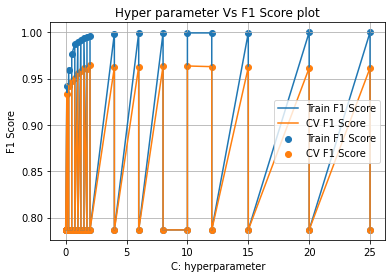

In [83]:
svm = SVC(kernel='rbf')
parameters = {'C':[ 0.0001, 0.001, 0.1, 0.25, 0.50, 0.75, 1, 1.25, 1.5, 1.75, 2.0, 4, 6, 8, 10, 12, 15, 20, 25], 'gamma':['scale', 'auto'],  }
clf = GridSearchCV(svm, parameters, cv=10, scoring='f1_micro', return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_C']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [ ]:
clf.best_params_

Number of misclassified points  9.455128205128204
-------------------------------------------------- Confusion matrix --------------------------------------------------


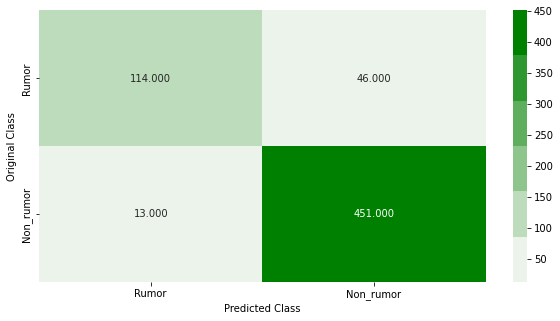

-------------------------------------------------- Precision matrix --------------------------------------------------


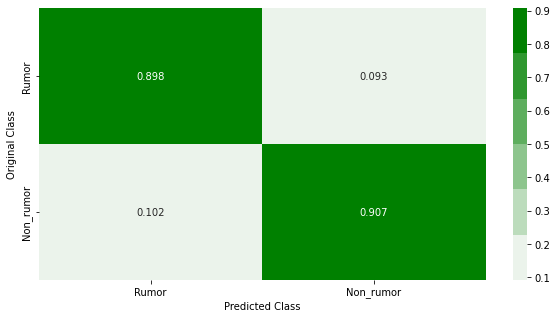

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


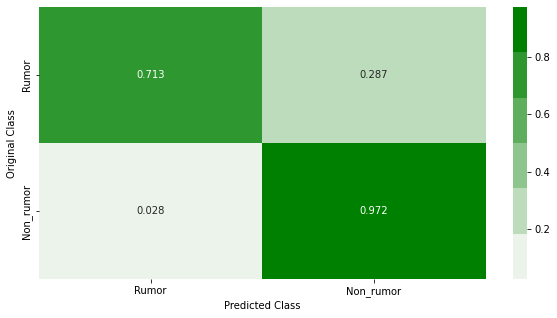

Sum of rows in Recall matrix [1. 1.]


In [47]:
svm_clf_rbf = SVC(C=1.5, gamma='scale', kernel='rbf', probability=True)
svm_clf_rbf.fit(Train, y_train)
plot_confusion_matrix(y_test, svm_clf_rbf.predict(Test))

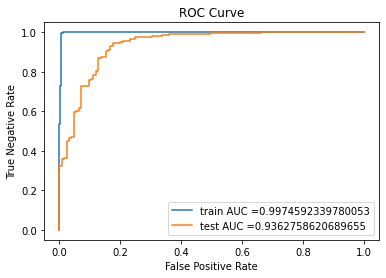

In [85]:
train_fpr, train_tpr, thresholds = metrics.roc_curve(y_train, svm_clf_rbf.predict_proba(Train)[::,1])
test_fpr, test_tpr, thresholds = metrics.roc_curve(y_test, svm_clf_rbf.predict_proba(Test)[::,1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(metrics.auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Negative Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
svm = SVC(kernel='poly')
parameters = {'C':[ 0.0001, 0.001, 0.1, 1,  1.5, 2.0, 2.5, 3, 5, 8, 10, 15, 25, 50, 60, 75, 85, 95, 100, 110, 125, 150], \
              'gamma':['scale', 'auto'], 'degree': [2,3,4,5]  }
clf = GridSearchCV(svm, parameters, cv=10, scoring='f1_micro', return_train_score=True, n_jobs=-1,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_C']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [ ]:
clf.best_params_

Number of misclassified points  12.01923076923077
-------------------------------------------------- Confusion matrix --------------------------------------------------


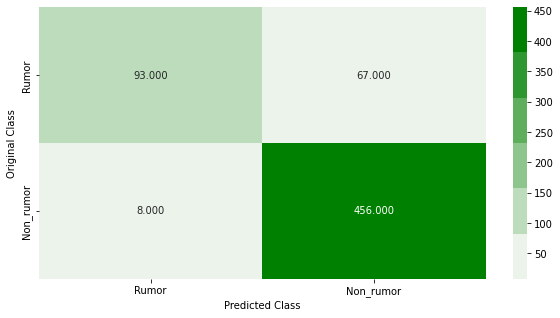

-------------------------------------------------- Precision matrix --------------------------------------------------


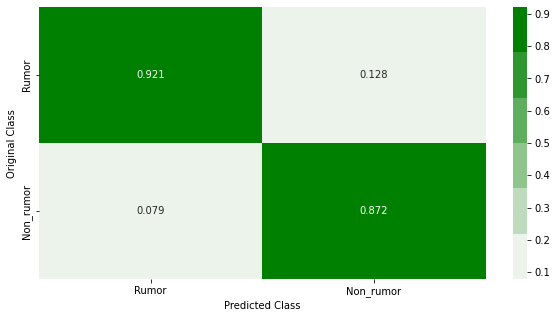

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


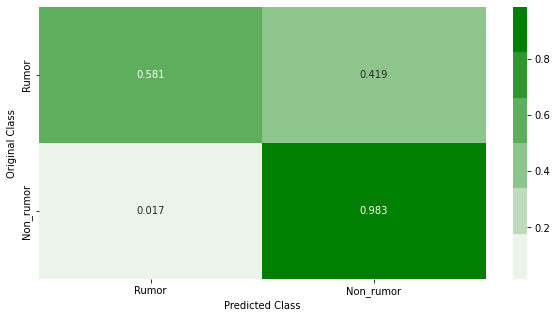

Sum of rows in Recall matrix [1. 1.]


In [48]:
svm_clf_poly = SVC(C=1, gamma='scale', degree=2, kernel='poly', probability=True)
svm_clf_poly.fit(Train, y_train)
plot_confusion_matrix(y_test, svm_clf_poly.predict(Test))

In [ ]:
train_fpr, train_tpr, thresholds = metrics.roc_curve(y_train, svm_clf_poly.predict_proba(Train)[::,1])
test_fpr, test_tpr, thresholds = metrics.roc_curve(y_test, svm_clf_poly.predict_proba(Test)[::,1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(metrics.auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Negative Rate")
plt.title("ROC Curve")
plt.show()

Fitting 10 folds for each of 7 candidates, totalling 70 fits


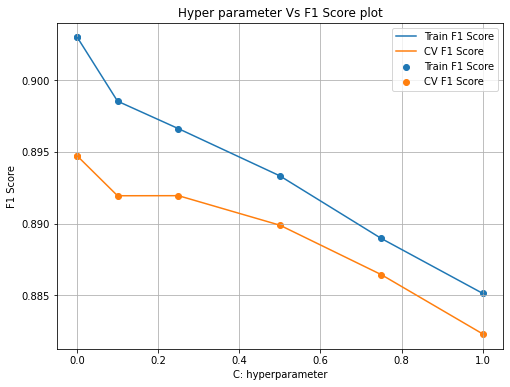

In [50]:
MNB = MultinomialNB()
parameters = {'alpha':[ 0.0001, 0.001, 0.1, 0.25, 0.50, 0.75, 1]}

clf = GridSearchCV(MNB, parameters, cv=10,n_jobs=-1, scoring='f1_micro', return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
# print(results)
results = results.sort_values(['param_alpha'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_alpha']
plt.figure(figsize=(8,6))
plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [51]:
clf.best_params_

{'alpha': 0.0001}

Number of misclassified points  13.301282051282051
-------------------------------------------------- Confusion matrix --------------------------------------------------


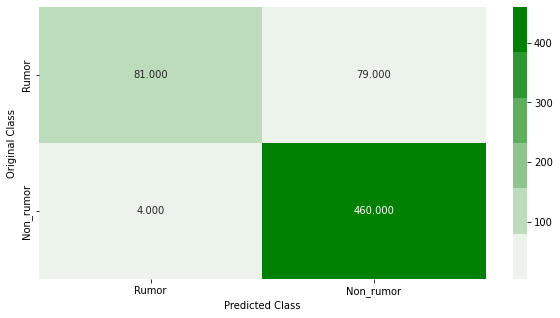

-------------------------------------------------- Precision matrix --------------------------------------------------


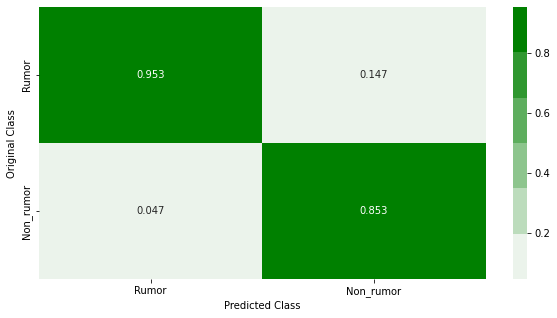

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


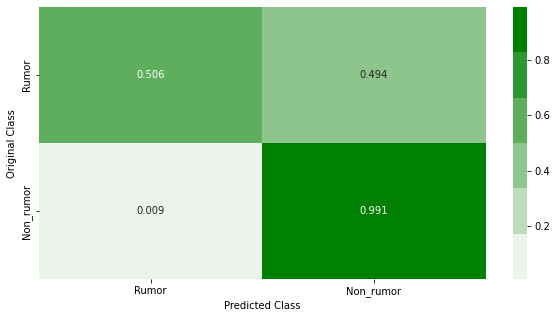

Sum of rows in Recall matrix [1. 1.]
[CV 1/10; 1/7] START alpha=0.0001...............................................
[CV 1/10; 1/7] END alpha=0.0001;, score=(train=0.904, test=0.897) total time=   0.0s
[CV 1/10; 2/7] START alpha=0.001................................................
[CV 1/10; 2/7] END alpha=0.001;, score=(train=0.904, test=0.897) total time=   0.0s
[CV 4/10; 2/7] START alpha=0.001................................................
[CV 4/10; 2/7] END alpha=0.001;, score=(train=0.907, test=0.876) total time=   0.0s
[CV 10/10; 2/7] START alpha=0.001...............................................
[CV 10/10; 2/7] END alpha=0.001;, score=(train=0.904, test=0.897) total time=   0.0s
[CV 5/10; 3/7] START alpha=0.1..................................................
[CV 5/10; 3/7] END alpha=0.1;, score=(train=0.897, test=0.903) total time=   0.0s
[CV 5/10; 6/7] START alpha=0.75.................................................
[CV 5/10; 6/7] END alpha=0.75;, score=(train=0.887, test=

[CV 7/10; 1/7] START alpha=0.0001...............................................
[CV 7/10; 1/7] END alpha=0.0001;, score=(train=0.906, test=0.883) total time=   0.0s
[CV 2/10; 2/7] START alpha=0.001................................................
[CV 2/10; 2/7] END alpha=0.001;, score=(train=0.903, test=0.890) total time=   0.0s
[CV 5/10; 2/7] START alpha=0.001................................................
[CV 5/10; 2/7] END alpha=0.001;, score=(train=0.902, test=0.903) total time=   0.0s
[CV 1/10; 3/7] START alpha=0.1..................................................
[CV 1/10; 3/7] END alpha=0.1;, score=(train=0.898, test=0.904) total time=   0.0s
[CV 2/10; 5/7] START alpha=0.5..................................................
[CV 2/10; 5/7] END alpha=0.5;, score=(train=0.895, test=0.863) total time=   0.0s
[CV 8/10; 5/7] START alpha=0.5..................................................
[CV 8/10; 5/7] END alpha=0.5;, score=(train=0.892, test=0.910) total time=   0.0s
[CV 7/10; 7/7] 

In [54]:
MNB_clf = MultinomialNB(alpha=0.0001)
MNB_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, MNB_clf.predict(Test))

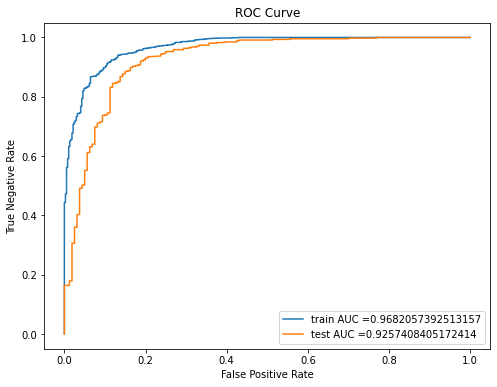

In [55]:
train_fpr, train_tpr, thresholds = metrics.roc_curve(y_train, MNB_clf.predict_proba(Train)[::,1])
test_fpr, test_tpr, thresholds = metrics.roc_curve(y_test, MNB_clf.predict_proba(Test)[::,1])
plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(metrics.auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Negative Rate")
plt.title("ROC Curve")
plt.show()

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV 1/10; 1/42] START C=0.001, penalty=l1, solver=newton-cg.....................
[CV 1/10; 1/42] END C=0.001, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10; 1/42] START C=0.001, penalty=l1, solver=newton-cg.....................
[CV 2/10; 1/42] END C=0.001, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10; 1/42] START C=0.001, penalty=l1, solver=newton-cg.....................
[CV 3/10; 1/42] END C=0.001, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10; 1/42] START C=0.001, penalty=l1, solver=newton-cg.....................
[CV 4/10; 1/42] END C=0.001, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/10; 1/42] START C=0.001, penalty=l1, solver=newton-cg.....................
[CV 5/10; 1/42] END C=0.001, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.

/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search

[CV 5/10; 5/42] END C=0.001, penalty=l2, solver=lbfgs;, score=(train=0.743, test=0.745) total time=   0.0s
[CV 6/10; 5/42] START C=0.001, penalty=l2, solver=lbfgs.........................
[CV 6/10; 5/42] END C=0.001, penalty=l2, solver=lbfgs;, score=(train=0.743, test=0.745) total time=   0.0s
[CV 7/10; 5/42] START C=0.001, penalty=l2, solver=lbfgs.........................
[CV 7/10; 5/42] END C=0.001, penalty=l2, solver=lbfgs;, score=(train=0.743, test=0.745) total time=   0.0s
[CV 8/10; 5/42] START C=0.001, penalty=l2, solver=lbfgs.........................
[CV 8/10; 5/42] END C=0.001, penalty=l2, solver=lbfgs;, score=(train=0.743, test=0.745) total time=   0.0s
[CV 9/10; 5/42] START C=0.001, penalty=l2, solver=lbfgs.........................
[CV 9/10; 5/42] END C=0.001, penalty=l2, solver=lbfgs;, score=(train=0.743, test=0.745) total time=   0.0s
[CV 10/10; 5/42] START C=0.001, penalty=l2, solver=lbfgs........................
[CV 10/10; 5/42] END C=0.001, penalty=l2, solver=lbfgs;, sco

/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search

[CV 7/10; 10/42] END C=0.01, penalty=l2, solver=newton-cg;, score=(train=0.743, test=0.745) total time=   0.0s
[CV 8/10; 10/42] START C=0.01, penalty=l2, solver=newton-cg.....................
[CV 8/10; 10/42] END C=0.01, penalty=l2, solver=newton-cg;, score=(train=0.743, test=0.745) total time=   0.0s
[CV 9/10; 10/42] START C=0.01, penalty=l2, solver=newton-cg.....................
[CV 9/10; 10/42] END C=0.01, penalty=l2, solver=newton-cg;, score=(train=0.743, test=0.745) total time=   0.0s
[CV 10/10; 10/42] START C=0.01, penalty=l2, solver=newton-cg....................
[CV 10/10; 10/42] END C=0.01, penalty=l2, solver=newton-cg;, score=(train=0.743, test=0.745) total time=   0.0s
[CV 1/10; 11/42] START C=0.01, penalty=l2, solver=lbfgs.........................
[CV 1/10; 11/42] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.744, test=0.740) total time=   0.0s
[CV 2/10; 11/42] START C=0.01, penalty=l2, solver=lbfgs.........................
[CV 2/10; 11/42] END C=0.01, penalty=l2, so

/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search

[CV 5/10; 16/42] END C=0.1, penalty=l2, solver=newton-cg;, score=(train=0.764, test=0.786) total time=   0.0s
[CV 6/10; 16/42] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 6/10; 16/42] END C=0.1, penalty=l2, solver=newton-cg;, score=(train=0.767, test=0.772) total time=   0.0s
[CV 7/10; 16/42] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 7/10; 16/42] END C=0.1, penalty=l2, solver=newton-cg;, score=(train=0.768, test=0.759) total time=   0.0s
[CV 8/10; 16/42] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 8/10; 16/42] END C=0.1, penalty=l2, solver=newton-cg;, score=(train=0.767, test=0.766) total time=   0.0s
[CV 9/10; 16/42] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 9/10; 16/42] END C=0.1, penalty=l2, solver=newton-cg;, score=(train=0.765, test=0.772) total time=   0.0s
[CV 10/10; 16/42] START C=0.1, penalty=l2, solver=newton-cg.....................
[CV 10/10; 16/42] END C=0.1, penalty=l2, solv

/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search

[CV 6/10; 22/42] END C=1.0, penalty=l2, solver=newton-cg;, score=(train=0.888, test=0.883) total time=   0.0s
[CV 7/10; 22/42] START C=1.0, penalty=l2, solver=newton-cg......................
[CV 7/10; 22/42] END C=1.0, penalty=l2, solver=newton-cg;, score=(train=0.891, test=0.869) total time=   0.0s
[CV 8/10; 22/42] START C=1.0, penalty=l2, solver=newton-cg......................
[CV 8/10; 22/42] END C=1.0, penalty=l2, solver=newton-cg;, score=(train=0.891, test=0.876) total time=   0.0s
[CV 9/10; 22/42] START C=1.0, penalty=l2, solver=newton-cg......................
[CV 9/10; 22/42] END C=1.0, penalty=l2, solver=newton-cg;, score=(train=0.888, test=0.897) total time=   0.0s
[CV 10/10; 22/42] START C=1.0, penalty=l2, solver=newton-cg.....................
[CV 10/10; 22/42] END C=1.0, penalty=l2, solver=newton-cg;, score=(train=0.891, test=0.869) total time=   0.0s
[CV 1/10; 23/42] START C=1.0, penalty=l2, solver=lbfgs..........................
[CV 1/10; 23/42] END C=1.0, penalty=l2, solv

/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 7/10; 28/42] END C=10.0, penalty=l2, solver=newton-cg;, score=(train=0.925, test=0.903) total time=   0.0s
[CV 8/10; 28/42] START C=10.0, penalty=l2, solver=newton-cg.....................
[CV 8/10; 28/42] END C=10.0, penalty=l2, solver=newton-cg;, score=(train=0.921, test=0.910) total time=   0.0s
[CV 9/10; 28/42] START C=10.0, penalty=l2, solver=newton-cg.....................
[CV 9/10; 28/42] END C=10.0, penalty=l2, solver=newton-cg;, score=(train=0.924, test=0.917) total time=   0.0s
[CV 10/10; 28/42] START C=10.0, penalty=l2, solver=newton-cg....................
[CV 10/10; 28/42] END C=10.0, penalty=l2, solver=newton-cg;, score=(train=0.926, test=0.890) total time=   0.0s
[CV 1/10; 29/42] START C=10.0, penalty=l2, solver=lbfgs.........................
[CV 1/10; 29/42] END C=10.0, penalty=l2, solver=lbfgs;, score=(train=0.926, test=0.911) total time=   0.0s
[CV 2/10; 29/42] START C=10.0, penalty=l2, solver=lbfgs.........................
[CV 2/10; 29/42] END C=10.0, penalty=l2, so

[CV 6/10; 34/42] END C=100.0, penalty=l2, solver=newton-cg;, score=(train=0.938, test=0.945) total time=   0.0s
[CV 7/10; 34/42] START C=100.0, penalty=l2, solver=newton-cg....................
[CV 7/10; 34/42] END C=100.0, penalty=l2, solver=newton-cg;, score=(train=0.939, test=0.883) total time=   0.0s
[CV 8/10; 34/42] START C=100.0, penalty=l2, solver=newton-cg....................
[CV 8/10; 34/42] END C=100.0, penalty=l2, solver=newton-cg;, score=(train=0.934, test=0.890) total time=   0.0s
[CV 9/10; 34/42] START C=100.0, penalty=l2, solver=newton-cg....................
[CV 9/10; 34/42] END C=100.0, penalty=l2, solver=newton-cg;, score=(train=0.937, test=0.931) total time=   0.0s
[CV 10/10; 34/42] START C=100.0, penalty=l2, solver=newton-cg...................
[CV 10/10; 34/42] END C=100.0, penalty=l2, solver=newton-cg;, score=(train=0.936, test=0.917) total time=   0.0s
[CV 1/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs........................
[CV 1/10; 35/42] END C=100.0, pena

[CV 5/10; 39/42] END C=1000.0, penalty=l1, solver=liblinear;, score=(train=0.936, test=0.938) total time=   0.0s
[CV 6/10; 39/42] START C=1000.0, penalty=l1, solver=liblinear...................
[CV 6/10; 39/42] END C=1000.0, penalty=l1, solver=liblinear;, score=(train=0.940, test=0.910) total time=   0.0s
[CV 7/10; 39/42] START C=1000.0, penalty=l1, solver=liblinear...................
[CV 7/10; 39/42] END C=1000.0, penalty=l1, solver=liblinear;, score=(train=0.945, test=0.883) total time=   0.0s
[CV 8/10; 39/42] START C=1000.0, penalty=l1, solver=liblinear...................
[CV 8/10; 39/42] END C=1000.0, penalty=l1, solver=liblinear;, score=(train=0.940, test=0.890) total time=   0.0s
[CV 9/10; 39/42] START C=1000.0, penalty=l1, solver=liblinear...................
[CV 9/10; 39/42] END C=1000.0, penalty=l1, solver=liblinear;, score=(train=0.939, test=0.917) total time=   0.0s
[CV 10/10; 39/42] START C=1000.0, penalty=l1, solver=liblinear..................
[CV 10/10; 39/42] END C=1000.0

/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/s

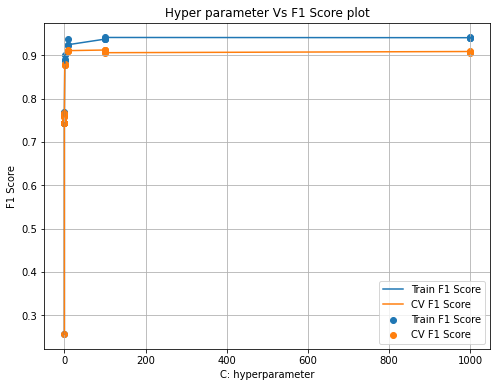

In [57]:
LR = LogisticRegression(max_iter=500, random_state=42)
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
clf = GridSearchCV(LR, parameters, cv=10, scoring='f1_micro', return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_C']
plt.figure(figsize=(8,6))
plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [59]:
clf.best_params_

{'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'}

Number of misclassified points  9.935897435897436
-------------------------------------------------- Confusion matrix --------------------------------------------------


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


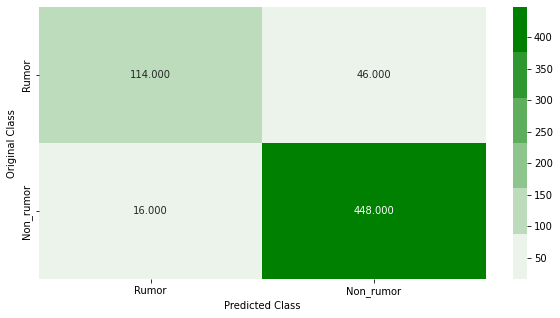

-------------------------------------------------- Precision matrix --------------------------------------------------


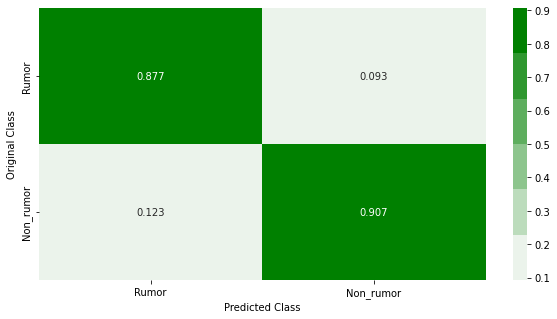

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


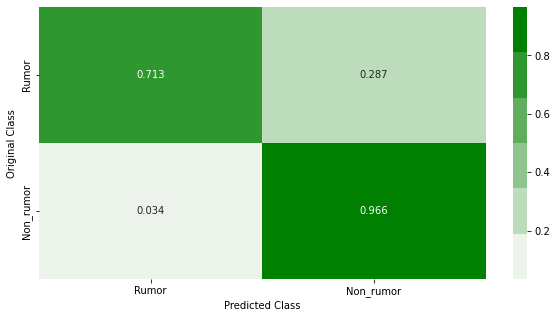

Sum of rows in Recall matrix [1. 1.]
CPU times: user 1.13 s, sys: 66.8 ms, total: 1.19 s
Wall time: 492 ms
[CV 6/10; 1/7] START alpha=0.0001...............................................
[CV 6/10; 1/7] END alpha=0.0001;, score=(train=0.898, test=0.917) total time=   0.0s
[CV 9/10; 1/7] START alpha=0.0001...............................................
[CV 9/10; 1/7] END alpha=0.0001;, score=(train=0.902, test=0.883) total time=   0.0s
[CV 6/10; 2/7] START alpha=0.001................................................
[CV 6/10; 2/7] END alpha=0.001;, score=(train=0.898, test=0.917) total time=   0.0s
[CV 2/10; 3/7] START alpha=0.1..................................................
[CV 2/10; 3/7] END alpha=0.1;, score=(train=0.898, test=0.890) total time=   0.0s
[CV 6/10; 3/7] START alpha=0.1..................................................
[CV 6/10; 3/7] END alpha=0.1;, score=(train=0.894, test=0.917) total time=   0.0s
[CV 7/10; 5/7] START alpha=0.5........................................

In [60]:
%%time
LR_clf = LogisticRegression(C= 100, penalty='l2', solver='newton-cg')
LR_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, LR_clf.predict(Test))

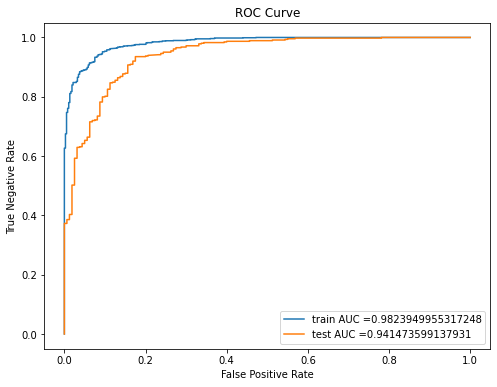

In [61]:
train_fpr, train_tpr, thresholds = metrics.roc_curve(y_train, LR_clf.predict_proba(Train)[::,1])
test_fpr, test_tpr, thresholds = metrics.roc_curve(y_test, LR_clf.predict_proba(Test)[::,1])
plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(metrics.auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Negative Rate")
plt.title("ROC Curve")
plt.show()

Fitting 10 folds for each of 12 candidates, totalling 120 fits


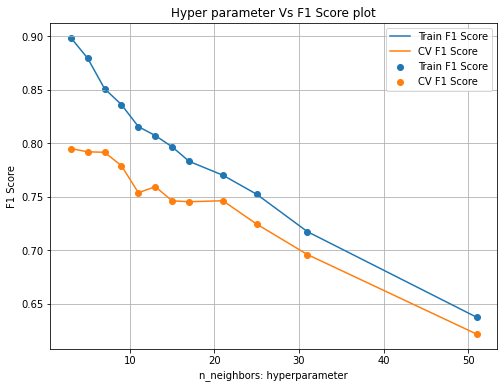

In [63]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
KNN = KNeighborsClassifier()
parameters = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15, 17, 21, 25, 31, 51]}
clf = GridSearchCV(KNN, parameters, cv=10, scoring='f1_macro', n_jobs=-1, return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_n_neighbors']
plt.figure(figsize=(8,6))
plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("n_neighbors: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [64]:
clf.best_params_

{'n_neighbors': 3}

Number of misclassified points  16.666666666666664
-------------------------------------------------- Confusion matrix --------------------------------------------------


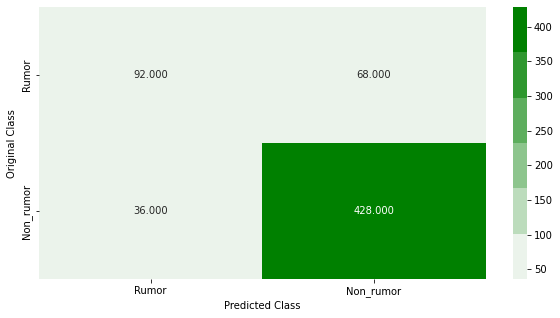

-------------------------------------------------- Precision matrix --------------------------------------------------


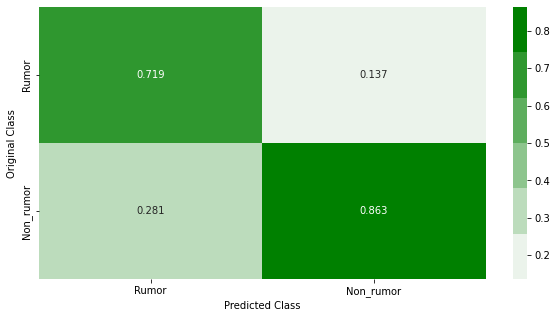

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


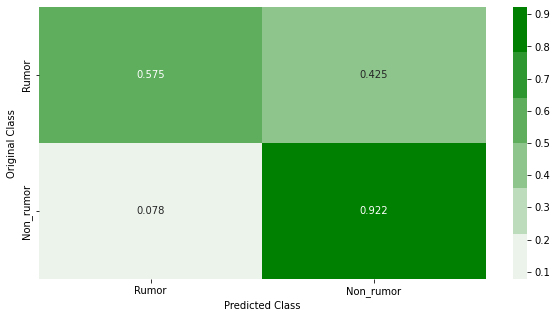

Sum of rows in Recall matrix [1. 1.]


In [65]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(n_neighbors=3)
KNN_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, KNN_clf.predict(Test))

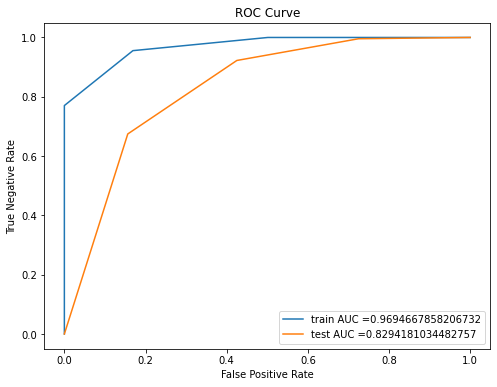

In [66]:
train_fpr, train_tpr, thresholds = metrics.roc_curve(y_train, KNN_clf.predict_proba(Train)[::,1])
test_fpr, test_tpr, thresholds = metrics.roc_curve(y_test, KNN_clf.predict_proba(Test)[::,1])
plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(metrics.auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Negative Rate")
plt.title("ROC Curve")
plt.show()

Fitting 10 folds for each of 42 candidates, totalling 420 fits


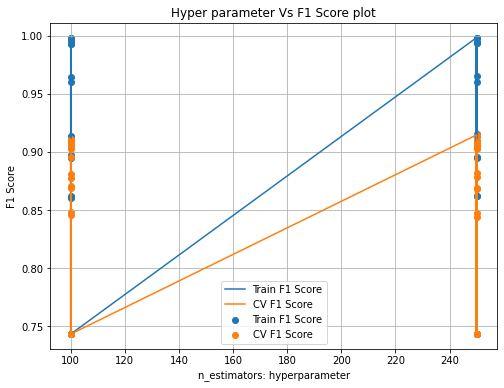

In [67]:
RF = RandomForestClassifier(n_jobs=-1)
parameters={
     'n_estimators': [100, 250],
     'max_depth': [5,8,10, 20, 50, 100, 250],
    'max_samples' : [0.6, 0.75, 1],
}
clf = GridSearchCV(RF, parameters, cv=10, scoring='f1_micro', n_jobs=-1, return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_estimators'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_n_estimators']
plt.figure(figsize=(8,6))
plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [68]:
clf.best_params_

{'max_depth': 250, 'max_samples': 0.75, 'n_estimators': 250}

Number of misclassified points  8.333333333333332
-------------------------------------------------- Confusion matrix --------------------------------------------------


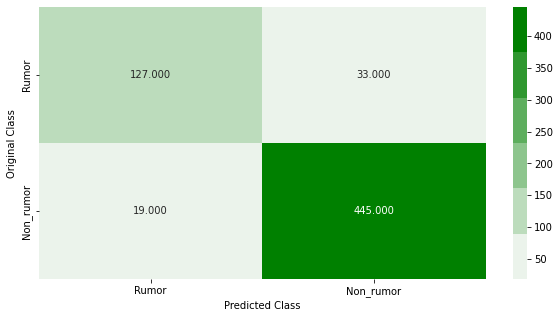

-------------------------------------------------- Precision matrix --------------------------------------------------


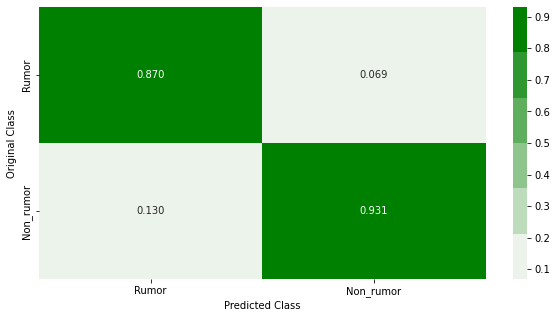

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


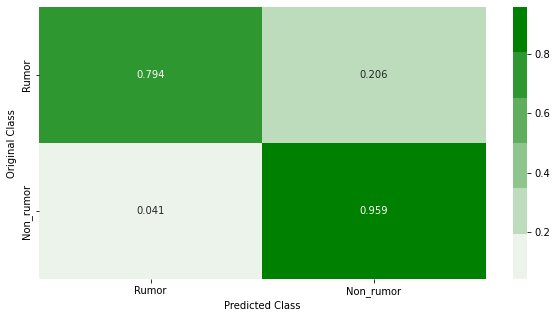

Sum of rows in Recall matrix [1. 1.]


In [69]:
RF_clf = RandomForestClassifier(n_estimators=250, max_depth=250, max_samples=0.75, n_jobs=-1)
RF_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, RF_clf.predict(Test))

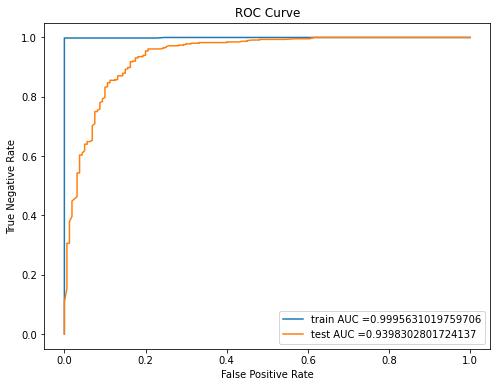

In [70]:
train_fpr, train_tpr, thresholds = metrics.roc_curve(y_train, RF_clf.predict_proba(Train)[::,1])
test_fpr, test_tpr, thresholds = metrics.roc_curve(y_test, RF_clf.predict_proba(Test)[::,1])
plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(metrics.auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Negative Rate")
plt.title("ROC Curve")
plt.show()

In [71]:
from prettytable import PrettyTable
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
myTable = PrettyTable(["Model","Train / Test", "Accuray", "F1-Score", "Precison", "Recall"])
  
# Add rows
myTable.add_row(["KNN", "Train", np.round(accuracy_score(y_train, KNN_clf.predict(Train)), 6), np.round(f1_score(y_train, KNN_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, KNN_clf.predict(Train), average='macro'), 6), \
                 np.round(recall_score(y_train, KNN_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["KNN", "Test", np.round(accuracy_score(y_test, KNN_clf.predict(Test)), 6), np.round(f1_score(y_test, KNN_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, KNN_clf.predict(Test), average='macro'), 6), \
                 np.round(recall_score(y_test, KNN_clf.predict(Test), average='macro'), 6)])

myTable.add_row(["SVC-Linear", "Train", np.round(accuracy_score(y_train, svm_clf.predict(Train)), 6), np.round(f1_score(y_train, svm_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, svm_clf.predict(Train), average='macro'), 6), \
                 np.round(recall_score(y_train, svm_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["SVC-Linear", "Test", np.round(accuracy_score(y_test, svm_clf.predict(Test)), 6), np.round(f1_score(y_test, svm_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, svm_clf.predict(Test), average='macro'), 6), \
                 np.round(recall_score(y_test, svm_clf.predict(Test), average='macro'), 6)])

myTable.add_row(["SVC-RBF", "Train", np.round(accuracy_score(y_train, svm_clf_rbf.predict(Train)), 6), np.round(f1_score(y_train, svm_clf_rbf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, svm_clf_rbf.predict(Train), average='macro'), 6), \
                 np.round(recall_score(y_train, svm_clf_rbf.predict(Train), average='macro'), 6)])

myTable.add_row(["SVC-RBF", "Test", np.round(accuracy_score(y_test, svm_clf_rbf.predict(Test)), 6), np.round(f1_score(y_test, svm_clf_rbf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, svm_clf_rbf.predict(Test), average='macro'), 6), \
                 np.round(recall_score(y_test, svm_clf_rbf.predict(Test), average='macro'), 6)])

myTable.add_row(["SVC-Poly", "Train", np.round(accuracy_score(y_train, svm_clf_poly.predict(Train)), 6), np.round(f1_score(y_train, svm_clf_poly.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, svm_clf_poly.predict(Train), average='macro'), 6), \
                 np.round(recall_score(y_train, svm_clf_poly.predict(Train), average='macro'), 6)])

myTable.add_row(["SVC-Poly", "Test", np.round(accuracy_score(y_test, svm_clf_poly.predict(Test)), 6), np.round(f1_score(y_test, svm_clf_poly.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, svm_clf_poly.predict(Test), average='macro'), 6), \
                 np.round(recall_score(y_test, svm_clf_poly.predict(Test), average='macro'), 6)])

myTable.add_row(["MultinomialNB", "Train", np.round(accuracy_score(y_train, MNB_clf.predict(Train)), 6), np.round(f1_score(y_train, MNB_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, MNB_clf.predict(Train), average='macro'), 6), \
                 np.round(recall_score(y_test, MNB_clf.predict(Test), average='macro'), 6)])
myTable.add_row(["MultinomialNB", "Test", np.round(accuracy_score(y_test, MNB_clf.predict(Test)), 6), np.round(f1_score(y_test, MNB_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, MNB_clf.predict(Test), average='macro'), 6), \
                 np.round(recall_score(y_test, MNB_clf.predict(Test), average='macro'), 6)])
myTable.add_row(["Logistic Regression","Train", np.round(accuracy_score(y_train, LR_clf.predict(Train)), 6), np.round(f1_score(y_train, LR_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, LR_clf.predict(Train), average='macro'), 6),\
                 np.round(recall_score(y_train, LR_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["Logistic Regression","Test", np.round(accuracy_score(y_test, LR_clf.predict(Test)), 6), np.round(f1_score(y_test, LR_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, LR_clf.predict(Test), average='macro'), 6),\
                 np.round(recall_score(y_test, LR_clf.predict(Test), average='macro'), 6)])
myTable.add_row(["Random Forest","Train", np.round(accuracy_score(y_train, RF_clf.predict(Train)), 6), np.round(f1_score(y_train, RF_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, RF_clf.predict(Train), average='macro'), 6),\
                 np.round(recall_score(y_train, RF_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["Random Forest","Test", np.round(accuracy_score(y_test, RF_clf.predict(Test)), 6), np.round(f1_score(y_test, RF_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, RF_clf.predict(Test), average='macro'), 6),\
                 np.round(recall_score(y_test, RF_clf.predict(Test), average='macro'), 6)])

print(myTable)

+---------------------+--------------+----------+----------+----------+----------+
|        Model        | Train / Test | Accuray  | F1-Score | Precison |  Recall  |
+---------------------+--------------+----------+----------+----------+----------+
|         KNN         |    Train     | 0.923606 | 0.898559 | 0.904194 | 0.893327 |
|         KNN         |     Test     | 0.833333 | 0.765278 | 0.790827 | 0.748707 |
|      SVC-Linear     |    Train     | 0.912595 | 0.873745 | 0.926531 | 0.842044 |
|      SVC-Linear     |     Test     | 0.886218 | 0.828978 | 0.904599 | 0.792457 |
|       SVC-RBF       |    Train     | 0.951824 | 0.933876 | 0.957971 | 0.914941 |
|       SVC-RBF       |     Test     | 0.905449 | 0.866515 | 0.902541 | 0.842241 |
|       SVC-Poly      |    Train     | 0.931865 | 0.902225 | 0.953722 | 0.869925 |
|       SVC-Poly      |     Test     | 0.879808 | 0.818328 | 0.896343 | 0.782004 |
|    MultinomialNB    |    Train     | 0.901583 | 0.851467 | 0.936126 | 0.748815 |
|   

[CV 8/10; 1/12] START n_neighbors=3.............................................
[CV 8/10; 1/12] END n_neighbors=3;, score=(train=0.907, test=0.819) total time=   0.1s
[CV 2/10; 2/12] START n_neighbors=5.............................................
[CV 2/10; 2/12] END n_neighbors=5;, score=(train=0.871, test=0.772) total time=   0.0s
[CV 7/10; 2/12] START n_neighbors=5.............................................
[CV 7/10; 2/12] END n_neighbors=5;, score=(train=0.887, test=0.772) total time=   0.0s
[CV 9/10; 3/12] START n_neighbors=7.............................................
[CV 9/10; 3/12] END n_neighbors=7;, score=(train=0.854, test=0.789) total time=   0.0s
[CV 8/10; 4/12] START n_neighbors=9.............................................
[CV 8/10; 4/12] END n_neighbors=9;, score=(train=0.826, test=0.804) total time=   0.1s
[CV 6/10; 5/12] START n_neighbors=11............................................
[CV 6/10; 5/12] END n_neighbors=11;, score=(train=0.813, test=0.764) total time

[CV 7/10; 1/12] START n_neighbors=3.............................................
[CV 7/10; 1/12] END n_neighbors=3;, score=(train=0.902, test=0.747) total time=   0.1s
[CV 9/10; 1/12] START n_neighbors=3.............................................
[CV 9/10; 1/12] END n_neighbors=3;, score=(train=0.899, test=0.765) total time=   0.0s
[CV 1/10; 3/12] START n_neighbors=7.............................................
[CV 1/10; 3/12] END n_neighbors=7;, score=(train=0.850, test=0.819) total time=   0.0s
[CV 7/10; 3/12] START n_neighbors=7.............................................
[CV 7/10; 3/12] END n_neighbors=7;, score=(train=0.849, test=0.747) total time=   0.0s
[CV 9/10; 4/12] START n_neighbors=9.............................................
[CV 9/10; 4/12] END n_neighbors=9;, score=(train=0.842, test=0.779) total time=   0.1s
[CV 7/10; 5/12] START n_neighbors=11............................................
[CV 7/10; 5/12] END n_neighbors=11;, score=(train=0.832, test=0.690) total time

[CV 5/10; 1/12] START n_neighbors=3.............................................
[CV 5/10; 1/12] END n_neighbors=3;, score=(train=0.896, test=0.769) total time=   0.1s
[CV 10/10; 1/12] START n_neighbors=3............................................
[CV 10/10; 1/12] END n_neighbors=3;, score=(train=0.893, test=0.734) total time=   0.0s
[CV 2/10; 3/12] START n_neighbors=7.............................................
[CV 2/10; 3/12] END n_neighbors=7;, score=(train=0.852, test=0.775) total time=   0.0s
[CV 10/10; 3/12] START n_neighbors=7............................................
[CV 10/10; 3/12] END n_neighbors=7;, score=(train=0.854, test=0.779) total time=   0.0s
[CV 6/10; 4/12] START n_neighbors=9.............................................
[CV 6/10; 4/12] END n_neighbors=9;, score=(train=0.841, test=0.800) total time=   0.0s
[CV 5/10; 5/12] START n_neighbors=11............................................
[CV 5/10; 5/12] END n_neighbors=11;, score=(train=0.811, test=0.754) total ti

## Custom Stacking Classifier:

##### a. Splitting the train data into 2 parts

In [ ]:
classifiers_dict = {
               "XGB": XGB_clf,
               "SVC_Linear": SVC(C=100, gamma="auto", kernel = "linear", probability=True, random_state=42),
               "SVC_Poly":SVC(C = 75, degree = 2, gamma = "auto", probability=True, kernel = "poly", random_state=42),
               "SVC_RBF":SVC(C = 100, degree = 1, gamma = "auto", probability=True, kernel = "rbf", random_state=42),
               "CatBoost": CBC_clf,
               "Random_Forest": RF_clf,
               "Logistic_Regression": LR_clf,
               "Extra_Tree":ETC_clf,
               "Decision_Tree":DTC_clf,
               "KNN":KNN_clf,
                "MBN":MNB_clf,
                "GBN":GNB_clf,
                "BNB":BNB_clf
               }

base_models_list = list(classifiers_dict.values())

In [ ]:
# splitting the Actuall Train Dataset into 50:50

Train_D1, Train_D2, y_train_D1, y_train_D2 = train_test_split(Train, y_train, test_size=0.5, stratify=y_train, random_state=42)

print('{} is the shape of Train Data D1 and {} is the shape of Train data D2.'.format(Train_D1.shape, Train_D2.shape))

In [ ]:
from sklearn.utils import resample
def stacking_classifier(k_model, base_models, meta_model, D1, D2, y_D1, y_D2, test, y_te):
  """This function performs custom stacking classification as it takes no. of base models, then the output of the base models will the added to the another dataset and that dataset used to train the meta classifier""" 
  base_model_fits = []
  predictions = pd.DataFrame()
  predictions_test = pd.DataFrame()
  for i in range(k_model):
      base_model = base_models[i]

      # Get a random sample with replacement with a size of 1000 from D1 
      train_sample, y_sample = resample(D1, y_D1, n_samples=1000, stratify=y_D1, random_state=42)

      base_model.fit(train_sample, y_sample) # train the model on sample
      base_model_fits.append(base_model) # save the base model

  for j in range(k_model): # send D2 to all base models
      y_pred = base_model_fits[j].predict_proba(D2) #predict  the probablities of the classes for D2 set
      for c in range(len(y_pred[0])):
          predictions[f"{j}{c}"] = y_pred[0:,c] # store the probablities of each class 

  for m in range(k_model): # send test data to all base models
      y_pred_test = base_model_fits[m].predict_proba(test) #predict  the probablities of the classes for test set
      for p in range(len(y_pred_test[0])):
          predictions_test[f"{m}{p}"] = y_pred_test[0:,p]  # store the probablities of each class
        
  meta_data_train = hstack((D2, predictions)) # stacking the D2 data and prediction probablities from k base model for meta classifier
  meta_data_test = hstack((test, predictions_test)) # stacking the train data and k prediction for test set

  
  meta_model.fit(meta_data_train, y_D2) # train the meta model on meta data
  print("F1-Score for {} as Meta classifier and {} number of base model is {}".format('Logistic_Regression', K+1, np.round(f1_score(y_te, meta_model.predict(meta_data_test), average='macro'), 6)))
  #plot_confusion_matrix(y_te, meta_model.predict(meta_data_test))

        
        
for K in range(len(base_models_list)):
  stacking_classifier(K+1, base_models_list, classifiers_dict['Logistic_Regression'], Train_D1, Train_D2, y_train_D1, y_train_D2, Test, y_test)
